# Importing Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,plot_confusion_matrix

In [2]:
os.chdir(r"C:\Users\Priya Sharma\OneDrive\Desktop\GlobalCert\Week 4")
fullRaw=pd.read_csv("drug200.csv")

In [3]:
fullRaw.head(6)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX


In [4]:
fullRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
fullRaw.shape

(200, 6)

## Visualisation

<AxesSubplot:>

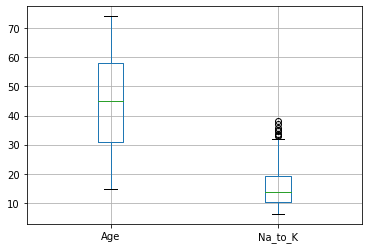

In [6]:
fullRaw.boxplot()

C:\Users\Priya Sharma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Na_to_K'>

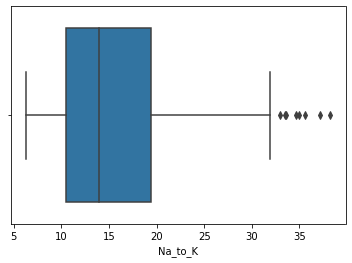

In [7]:
sns.boxplot(fullRaw["Na_to_K"])

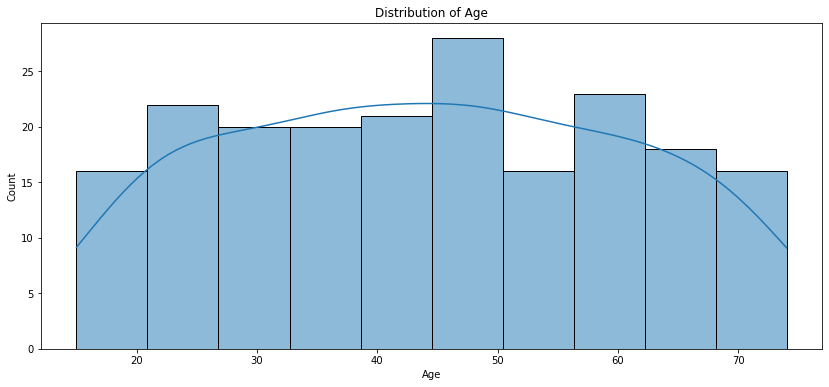

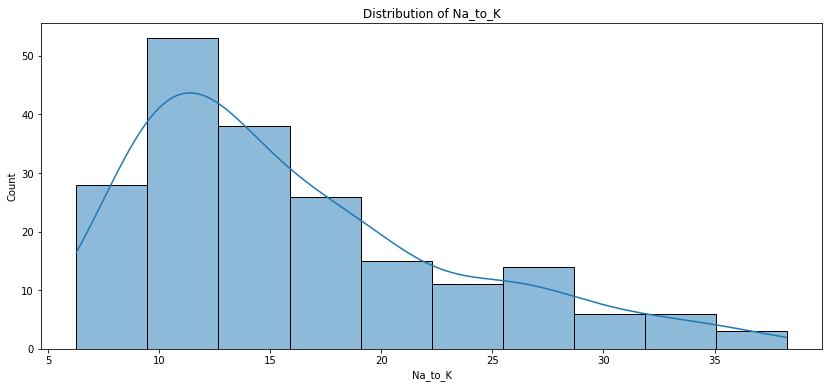

In [8]:
numerical_cols=fullRaw.select_dtypes(include=np.number).columns.to_list()
numerical_cols

for col in numerical_cols:
    plt.figure(figsize=(14,6))
    sns.histplot(data=fullRaw,x=col,bins=10,kde=True)
    plt.title(f"Distribution of {col}")

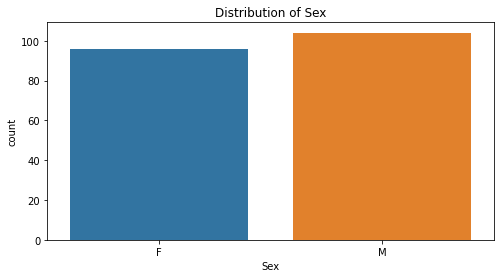

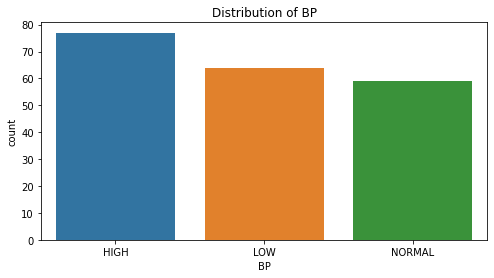

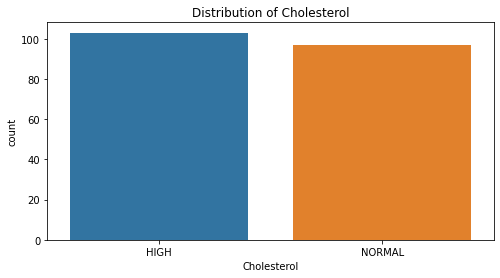

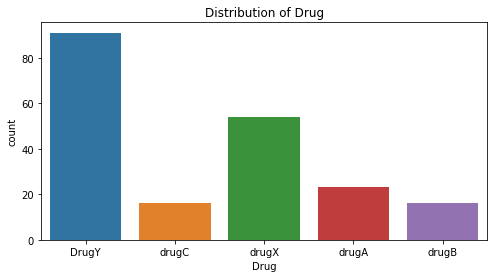

In [9]:
categorical_cols=fullRaw.select_dtypes(include=object).columns.to_list()
categorical_cols

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=fullRaw,x=col)
    plt.title(f"Distribution of {col}")    

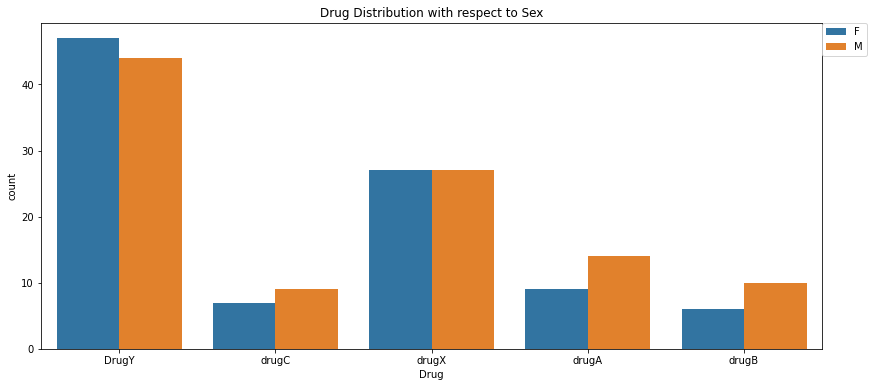

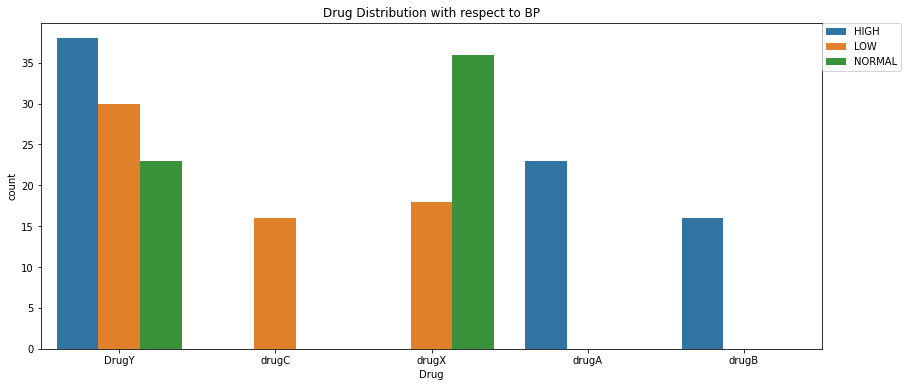

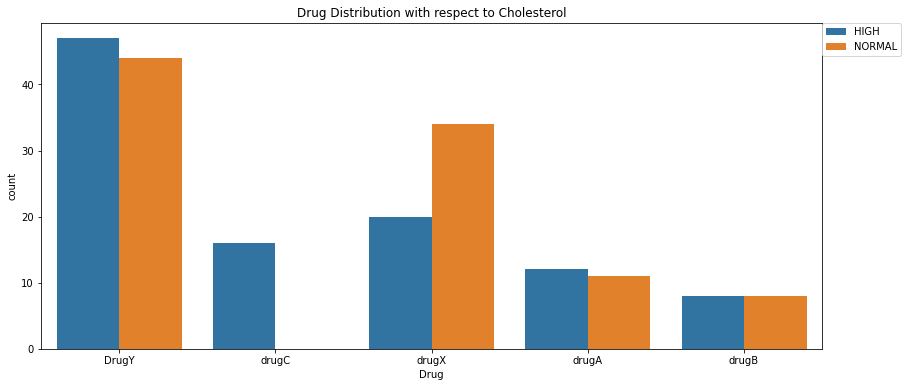

In [10]:
for col in categorical_cols:
    if col=='Drug':
        continue   
    plt.figure(figsize=(14,6))
    sns.countplot(data=fullRaw,x='Drug',hue=col)
    plt.legend(bbox_to_anchor=(1.0,1.0),loc='upper left',borderaxespad=0)
    plt.title(f"Drug Distribution with respect to {col}")

In [9]:
fullRaw.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

## Univariate Analysis

In [10]:
fullRaw[['Drug']].apply(pd.Series.value_counts)

,Drug
DrugY,91
drugX,54
drugA,23
drugB,16
drugC,16


In [11]:
fullRaw[['Sex']].apply(pd.Series.value_counts)

,Sex
M,104
F,96


In [12]:
fullRaw[['BP']].apply(pd.Series.value_counts)

,BP
HIGH,77
LOW,64
NORMAL,59


In [13]:
fullRaw[['Cholesterol']].apply(pd.Series.value_counts)

,Cholesterol
HIGH,103
NORMAL,97


In [14]:
fullRaw.Sex = fullRaw.Sex.map(dict(F=1, M=2))

In [15]:
fullRaw.Cholesterol = fullRaw.Cholesterol.map(dict(HIGH=1, NORMAL=0))

In [16]:
fullRaw["Drug"].replace({"DrugY":1,"drugX":2,"drugA":3,"drugB":4,"drugC":5},inplace=True)

In [17]:
fullRaw["BP"].replace({"HIGH":1,"LOW":2,"NORMAL":0},inplace=True)

## Train and Test Split 

In [18]:
from sklearn.model_selection import train_test_split,GridSearchCV
TrainRaw, TestRaw = train_test_split(fullRaw, train_size=0.8, random_state = 1234)

In [19]:
TrainRaw['Source'] = 'Train'
TestRaw['Source'] = 'Test'

In [20]:
fullRaw = pd.concat([TrainRaw, TestRaw], axis = 0)

In [21]:
fullRaw.shape

(200, 7)

In [22]:
fullRaw["Source"].replace({"Train":1,"Test":0},inplace=True)                 

In [23]:
fullRaw["Drug"].replace({1:"DrugY",2:"drugX",3:"drugA",4:"drugB",5:"drugC"},inplace=True)

In [24]:
Train = fullRaw[fullRaw['Source'] == 1].drop(['Source'], axis = 1).copy()
Test = fullRaw[fullRaw['Source'] == 0].drop(['Source'], axis = 1).copy()

In [25]:
Train.dtypes

Age              int64
Sex              int64
BP               int64
Cholesterol      int64
Na_to_K        float64
Drug            object
dtype: object

In [26]:
depVar = "Drug"
trainX = Train.drop([depVar], axis = 1).copy()
trainY = Train[depVar].copy()
testX = Test.drop([depVar], axis = 1).copy()
testY = Test[depVar].copy()

In [27]:
trainX.shape

(160, 5)

In [28]:
testX.shape

(40, 5)

## Model 1

In [29]:
M1 = SVC()
M1_Model = M1.fit(trainX, trainY) 

In [30]:
Test_Class = M1_Model.predict(testX)
Confusion_Mat = confusion_matrix(testY, Test_Class)
Confusion_Mat

sum(np.diagonal(Confusion_Mat))/testX.shape[0]*100
print(classification_report(testY, Test_Class))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        19
       drugA       0.00      0.00      0.00         3
       drugB       0.00      0.00      0.00         4
       drugC       0.00      0.00      0.00         4
       drugX       0.48      1.00      0.65        10

    accuracy                           0.73        40
   macro avg       0.30      0.40      0.33        40
weighted avg       0.59      0.72      0.64        40



C:\Users\Priya Sharma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Priya Sharma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Priya Sharma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
myCost = [4.5,4.9,5]
myKernel = ['sigmoid','rbf','linear','poly']

my_param_grid = {'C': myCost, 'kernel': myKernel}

## Grid Search and Model 2

In [32]:
M2=GridSearchCV(M1,my_param_grid)

In [33]:
M2.fit(trainX,trainY)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [4.5, 4.9, 5],
                         'kernel': ['sigmoid', 'rbf', 'linear', 'poly']})

In [34]:
M2.best_params_

{'C': 4.5, 'kernel': 'linear'}

In [35]:
pred=M2.predict(testX)

In [36]:
pred

array(['drugX', 'DrugY', 'drugB', 'DrugY', 'drugX', 'DrugY', 'drugX',
       'drugC', 'drugX', 'drugX', 'DrugY', 'drugX', 'drugC', 'DrugY',
       'DrugY', 'drugC', 'DrugY', 'DrugY', 'DrugY', 'DrugY', 'drugA',
       'drugA', 'DrugY', 'drugX', 'DrugY', 'drugX', 'DrugY', 'drugB',
       'DrugY', 'DrugY', 'DrugY', 'drugC', 'drugX', 'drugX', 'DrugY',
       'drugX', 'DrugY', 'DrugY', 'drugX', 'drugX'], dtype=object)

## Model Evaluation

In [37]:
print(classification_report(testY,pred))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        19
       drugA       1.00      0.67      0.80         3
       drugB       1.00      0.50      0.67         4
       drugC       1.00      1.00      1.00         4
       drugX       0.77      1.00      0.87        10

    accuracy                           0.93        40
   macro avg       0.95      0.83      0.87        40
weighted avg       0.94      0.93      0.92        40



In [38]:
accuracy = accuracy_score(testY,pred)*100
print(accuracy)

92.5


In [39]:
fullRaw["Drug"].replace({1:"DrugY",2:"drugX",3:"drugA",4:"drugB",5:"drugC"},inplace=True)

C:\Users\Priya Sharma\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


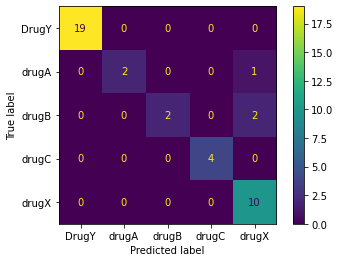

In [40]:
plot_confusion_matrix(M2,testX,testY)